In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('D:\_ANCONDA WORKSHOP\datasets\diabetes_kaggle.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

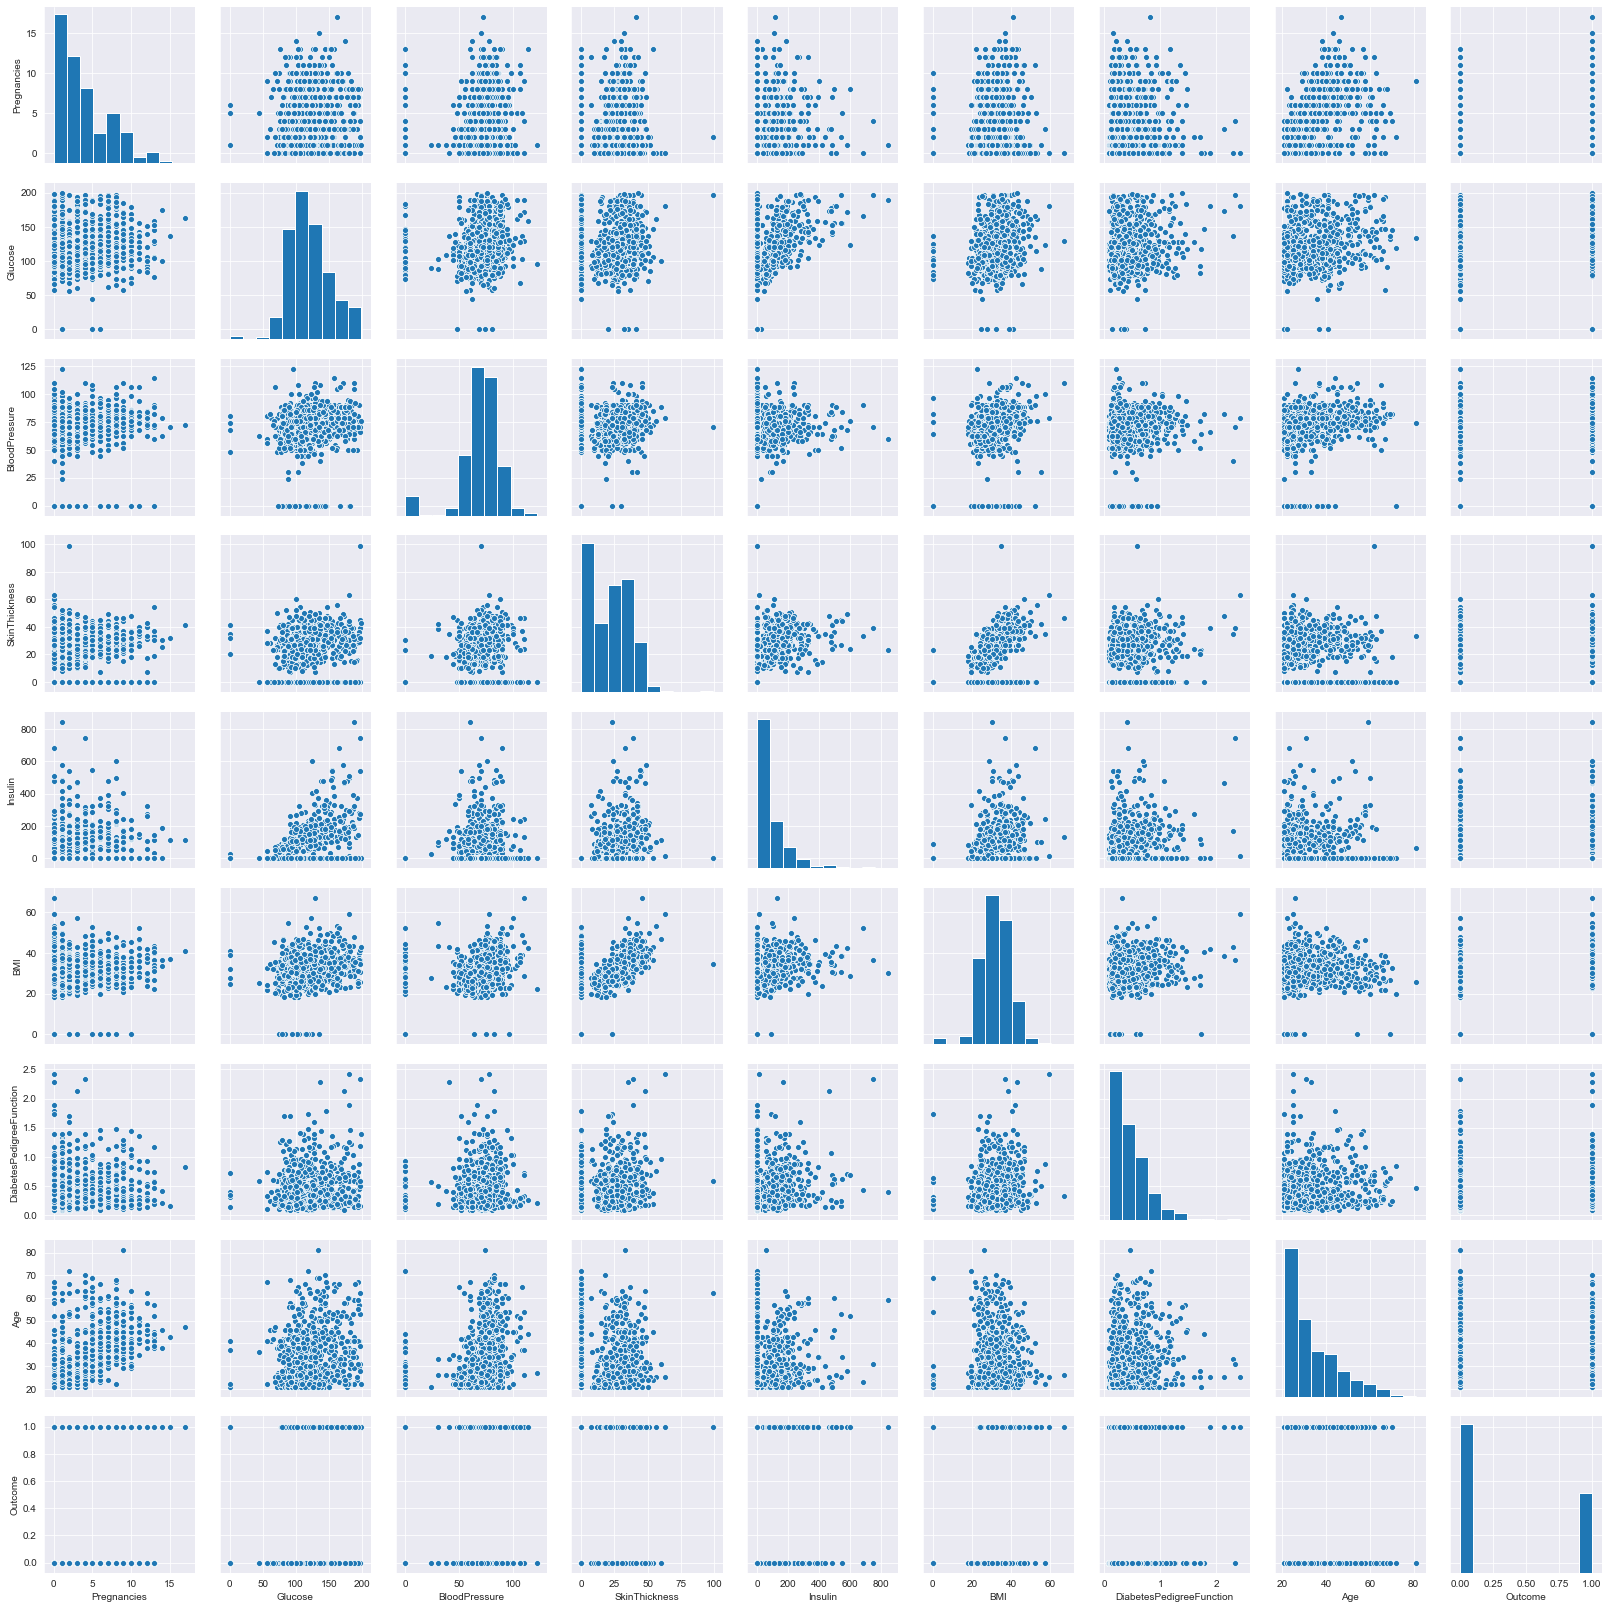

In [8]:
sns.pairplot(df)

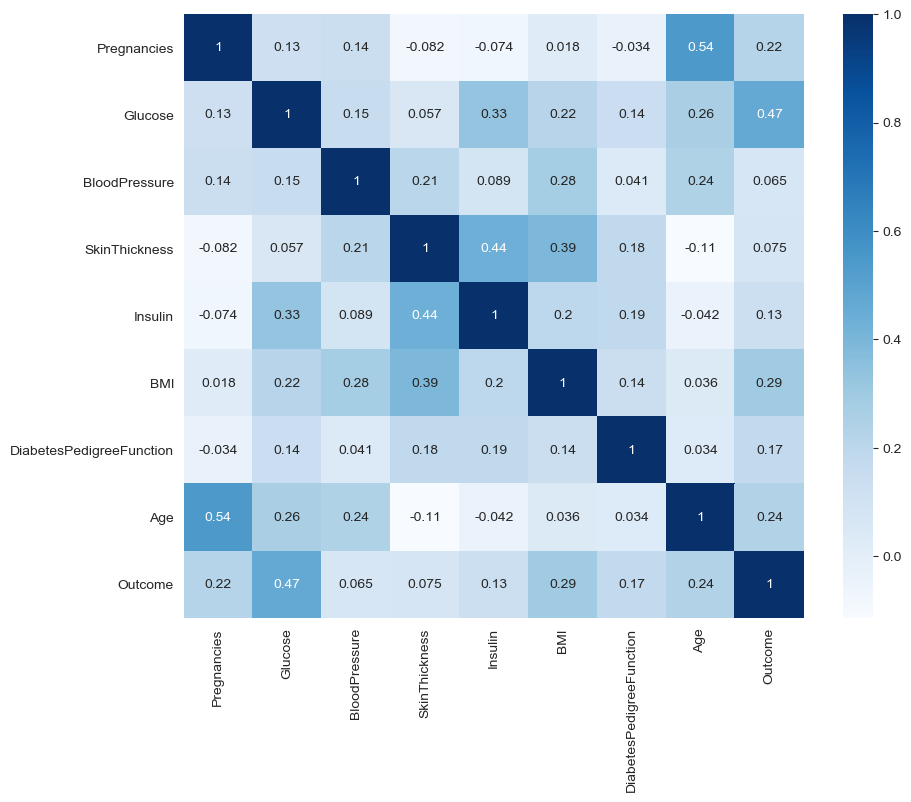

In [9]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap='Blues',annot=True)

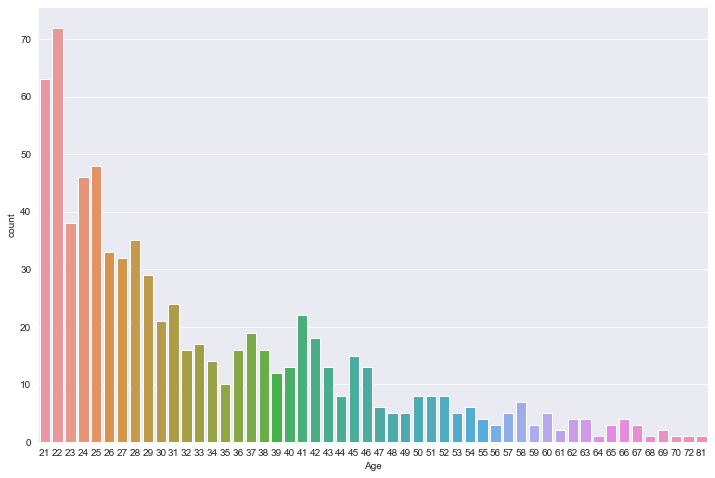

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df.Age)

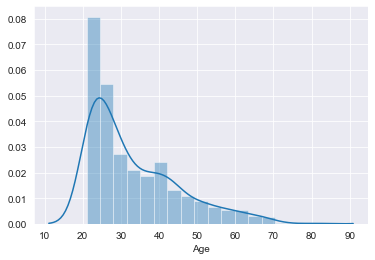

In [11]:
sns.distplot(df.Age)

Based on above two plots, most of the people in population lies in Age range of 21-31

In [12]:
#count of the people in age range 21-31
df[(df['Age']>=21 )& (df['Age']<=31)].count()

Pregnancies                 441
Glucose                     441
BloodPressure               441
SkinThickness               441
Insulin                     441
BMI                         441
DiabetesPedigreeFunction    441
Age                         441
Outcome                     441
dtype: int64

In [13]:
d=441/768
print(d,'% people lie in 21-31 age range')

0.57421875 % people lie in 21-31 age range


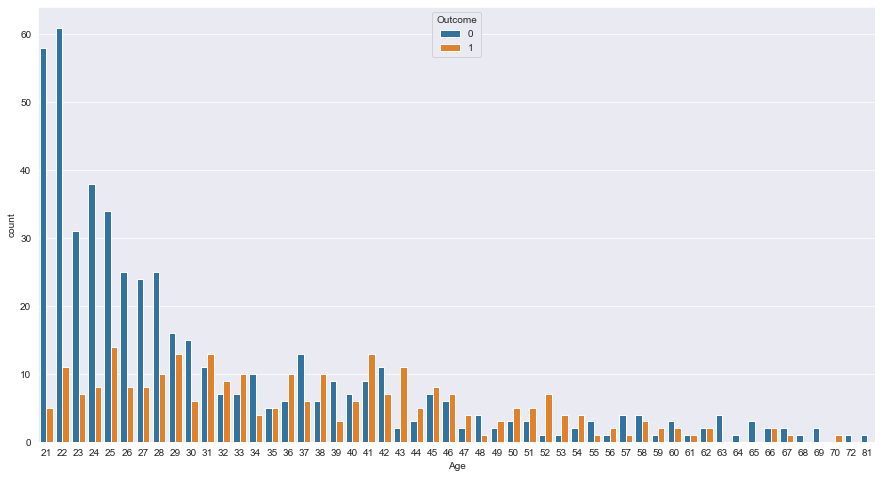

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(df.Age,hue=df['Outcome'])

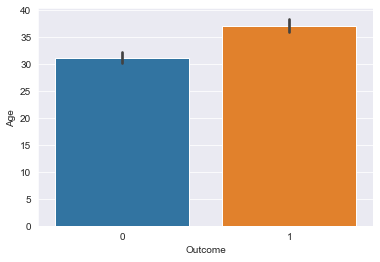

In [15]:
sns.barplot(data=df,x='Outcome',y='Age')

In [16]:
list=['Glucose BloodPressure SkinThickness BMI Insulin'.split()]

In [17]:
for x in list:
    df[x]=df[x].replace(0,np.NaN)
    mean=df[x].mean()
    df[x]=df[x].replace(np.NaN,mean)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
sc.fit(df.drop(df['Outcome']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop('Outcome',axis=1)
y=df.Outcome
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(algorithm="brute",leaf_size=90)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=90, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
pre=knn.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
print(confusion_matrix(y_test,pre))

[[115  36]
 [ 27  53]]


In [54]:
print(accuracy_score(y_test,pre))

0.7272727272727273


In [55]:
classification_report(y_test,pre)

'              precision    recall  f1-score   support\n\n           0       0.81      0.76      0.78       151\n           1       0.60      0.66      0.63        80\n\n    accuracy                           0.73       231\n   macro avg       0.70      0.71      0.71       231\nweighted avg       0.74      0.73      0.73       231\n'